# Name:- Parshwa Shah
# Experiment No.:- 8
# Roll No.- 34
# UID:- 2019230071
# Batch:- B

<h2>Aim:- Understanding Support Vector Machine algorithm through building SVM algorithm in Python </h2>


<center> <h1> Support Vector Machine </h1><center>

<h3>Importing the libraries </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Linear Kernel

In [2]:
from sklearn.metrics import confusion_matrix

# Function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)

    # Support vectors indicated in plot by vertical lines

    sv = svc.support_vectors_

    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths=1) 
    plt.xlim(x_min, x_max)

    plt.ylim(y_min, y_max) 
    plt.xlabel('X1')

    plt.ylabel('X2') 
    plt.show()

    print('Number of support vectors: ', svc.support_.size)

In [3]:
# Generating random data: 20 observations of 2 features and divide into two
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1] + 1

In [4]:
X

array([[ 0.44122749, -0.33087015],
       [ 2.43077119, -0.25209213],
       [ 0.10960984,  1.58248112],
       [-0.9092324 , -0.59163666],
       [ 0.18760323, -0.32986996],
       [-1.19276461, -0.20487651],
       [-0.35882895,  0.6034716 ],
       [-1.66478853, -0.70017904],
       [ 1.15139101,  1.85733101],
       [-1.51117956,  0.64484751],
       [ 0.01939211,  0.14314685],
       [ 0.12812082,  0.57749207],
       [ 1.99643983,  1.71242127],
       [ 1.05914424,  0.63668912],
       [ 1.00328884,  0.89406956],
       [ 1.79305332,  0.36842837],
       [ 0.99380509,  0.89893239],
       [ 0.94769185,  1.24921766],
       [ 1.19766009,  2.33484857],
       [ 0.91312439,  2.56153229]])

In [5]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

Text(0, 0.5, 'X2')

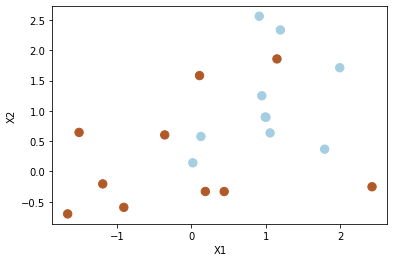

In [6]:
# Scatter plot between the two features, where colour indicates the target class
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

<h3>Linear or Non Linear? <br/>
Not linearly separable </h3>

In [7]:
# Fitting the Support Vector Classifier Model
from sklearn.svm import SVC
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)

SVC(C=1, kernel='linear')

In [8]:
svc.support_ # Determining the identities of support vectors

array([10, 11, 13, 14, 15, 16, 17,  0,  1,  2,  4,  6,  8], dtype=int32)

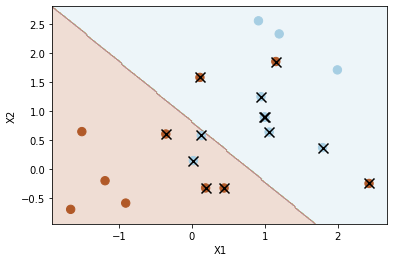

Number of support vectors:  13


In [9]:
plot_svc(svc, X, y)

The region of feature space that will be assigned to the -1 class is shown in light blue, and the region that will be assigned to the +1 class is shown in brown.

The decision boundary between the two classes is linear (because we used the argument kernel = ”linear”).

The support vectors are plotted with crosses and the remaining observations are plotted as circles; we see here that there are 13 support vectors.

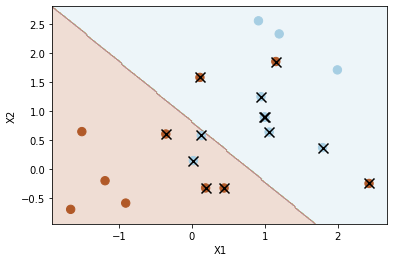

Number of support vectors:  13


In [10]:
# Using a smaller value of C argument
svc2 = SVC(C=1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [11]:
# Performing cross validation 10-fold
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(
    SVC(kernel='linear'), 
    tuned_parameters, 
    cv=10, 
    scoring='accuracy'
)
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

In [12]:
clf.cv_results_ # Cross validation scores and errors for each split

{'mean_fit_time': array([0.00082748, 0.00071521, 0.00075016, 0.00088277, 0.00125291,
        0.00103903, 0.00090382]),
 'mean_score_time': array([0.00045698, 0.00041168, 0.00043888, 0.00066428, 0.00093348,
        0.00058563, 0.00043015]),
 'mean_test_score': array([0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split3_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split5_test_sc

In [13]:
clf.best_params_

{'C': 0.001}

C=0.001 is best parameter given by GridSearchCV

In [14]:
# Generating a test dataset
np.random.seed(1)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
X_test[y_test == 1] = X_test[y_test == 1] -1

In [15]:
X_test

array([[ 1.62434536, -0.61175641],
       [-1.52817175, -2.07296862],
       [-0.13459237, -3.3015387 ],
       [ 0.74481176, -1.7612069 ],
       [-0.6809609 , -1.24937038],
       [ 0.46210794, -3.06014071],
       [-1.3224172 , -1.38405435],
       [ 1.13376944, -1.09989127],
       [-0.17242821, -0.87785842],
       [-0.95778625, -0.41718479],
       [-2.10061918,  0.14472371],
       [ 0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786],
       [-1.12289023, -1.93576943],
       [-0.26788808,  0.53035547],
       [-0.69166075, -0.39675353],
       [-0.6871727 , -0.84520564],
       [-1.67124613, -1.0126646 ],
       [-2.11731035, -0.7655843 ],
       [ 0.65980218, -0.25795584]])

In [16]:
y_test

array([-1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,
        1,  1,  1])

In [17]:
# Fitting SVC with best C value
svc2 = SVC(C=0.001, kernel='linear')
svc2.fit(X, y)
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc2.classes_, columns=['-1','+1'])

,-1,+1
-1,2,6
1,0,12


In [18]:
pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual -1','Actual +1'], columns=['Predicted -1','Predicted +1'])

,Predicted -1,Predicted +1
Actual -1,2,6
Actual +1,0,12


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.25      0.40         8
           1       0.67      1.00      0.80        12

    accuracy                           0.70        20
   macro avg       0.83      0.62      0.60        20
weighted avg       0.80      0.70      0.64        20



Text(0, 0.5, 'X2')

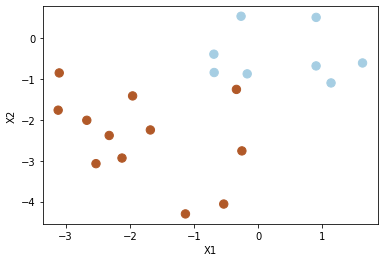

In [20]:
# Making nearly linearly separable data
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

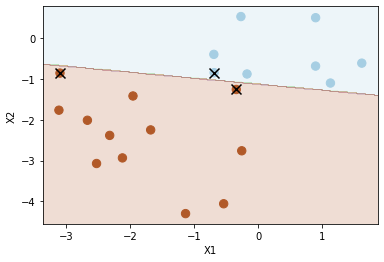

Number of support vectors:  3


In [21]:
svc3 = SVC(C=1e5, kernel='linear')
svc3.fit(X_test, y_test)
plot_svc(svc3, X_test, y_test)

No training errors were made and only three support vectors were used.

However, we can see from the figure that the margin is very narrow (because the observations that are not support vectors, indicated as circles, are very close to the decision boundary).

It seems likely that this model will perform poorly on test data

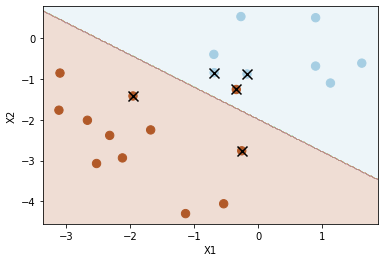

Number of support vectors:  5


In [22]:
# Trying a smaller value of C for this new dataset
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X_test, y_test)
plot_svc(svc4, X_test, y_test)

Using cost = 1, we misclassify a training observation, but we also obtain a much wider margin and make use of five support vectors.

It seems likely that this model will perform better on test data than the model with cost = 1e5.

### Non-linear Kernels

In [23]:
from sklearn.model_selection import train_test_split
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

Text(0, 0.5, 'X2')

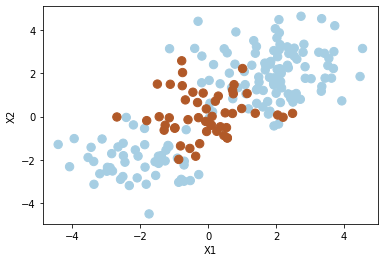

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

One class is kind of stuck in the middle of another class. This suggests that we might want to use a radial kernel in our SVM.

#### Rbf kernel

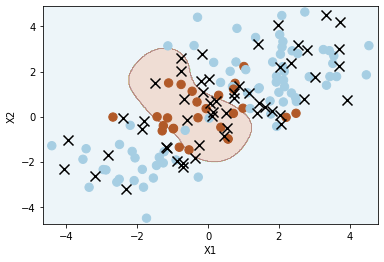

Number of support vectors:  54


In [25]:
# Using the SVC() function with a radial kernel and γ = 1
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_test, y_test)

The plot shows that the resulting SVM has a decidedly non-linear boundary.

We can see from the figure that there are a fair number of training errors in this SVM fit.

If we increase the value of cost, we can reduce the number of training error

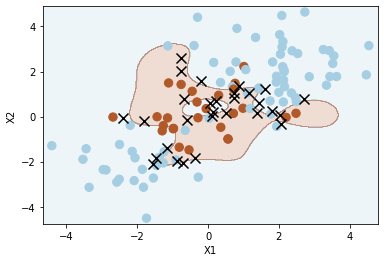

Number of support vectors:  29


In [26]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

We can perform cross-validation using GridSearchCV() to select the best choice of γ and cost for an SVM with a radial kernel

In [27]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 1, 'gamma': 0.5}

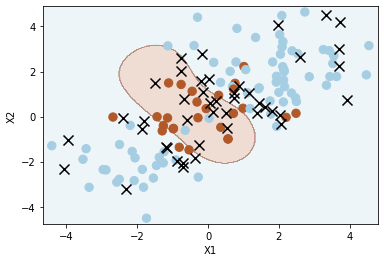

Number of support vectors:  44


In [28]:
plot_svc(clf.best_estimator_, X_test, y_test)

In [29]:
y_pred = clf.best_estimator_.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual -1','Actual +1'], columns=['Predicted -1','Predicted +1'])

,Predicted -1,Predicted +1
Actual -1,72,2
Actual +1,12,14


In [30]:
print(clf.best_estimator_.score(X_test, y_test))

0.86


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.86      0.97      0.91        74
           1       0.88      0.54      0.67        26

    accuracy                           0.86       100
   macro avg       0.87      0.76      0.79       100
weighted avg       0.86      0.86      0.85       100



#### Polynomial kernel

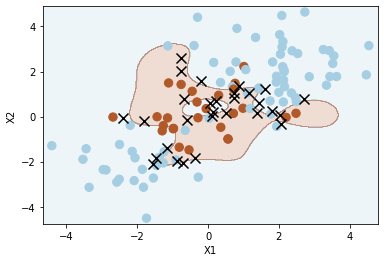

Number of support vectors:  29


In [32]:
svm3 = SVC(C=100, kernel='poly', gamma=1.0)
svm3.fit(X_train, y_train)
plot_svc(svm2, X_test, y_test)

We can perform cross-validation using GridSearchCV() to select the best choice of γ and cost for an SVM with a polynomial kernel.

In [33]:
tuned_parameters = [{'C': [0.01, 0.1, 1],'gamma': [0.5, 1, 2]}]
clf2 = GridSearchCV(SVC(kernel='poly'), tuned_parameters, cv=10, scoring='accuracy', n_jobs=-1)
clf2.fit(X_train, y_train)
clf2.best_params_

{'C': 0.01, 'gamma': 0.5}

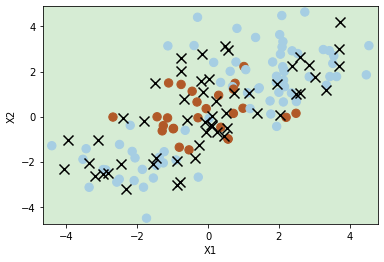

Number of support vectors:  54


In [34]:
plot_svc(clf2.best_estimator_, X_test, y_test)

In [35]:
y_pred = clf2.best_estimator_.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=['Actual -1','Actual +1'], columns=['Predicted -1','Predicted +1'])

,Predicted -1,Predicted +1
Actual -1,74,0
Actual +1,26,0


In [36]:
print(clf2.best_estimator_.score(X_test, y_test))

0.74


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.74      1.00      0.85        74
           1       0.00      0.00      0.00        26

    accuracy                           0.74       100
   macro avg       0.37      0.50      0.43       100
weighted avg       0.55      0.74      0.63       100



Rbf kernel performs better than polynomial kernel for the same data when non-linear SVM is used.

### Working on Pulsar Dataset

#### Downloading the training set

In [38]:
!gdown --id 1YSFW8DGpoU7iBB6TxnnltOFc1bkCBZC_

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1YSFW8DGpoU7iBB6TxnnltOFc1bkCBZC_
To: /content/pulsar_data_test.csv
100% 542k/542k [00:00<00:00, 77.4MB/s]


#### Downloading the testing set

In [39]:
!gdown --id 18suswE049ki9zxJreR45kGrvW14vgJ_N

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18suswE049ki9zxJreR45kGrvW14vgJ_N
To: /content/pulsar_data_train.csv
100% 1.30M/1.30M [00:00<00:00, 118MB/s]


#### Load training and testing set

In [40]:
train = pd.read_csv('pulsar_data_train.csv')

In [41]:
test = pd.read_csv('pulsar_data_test.csv')

In [42]:
train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


#### Check for null values in dataset

In [43]:
train.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

#### Show the distribution of output class

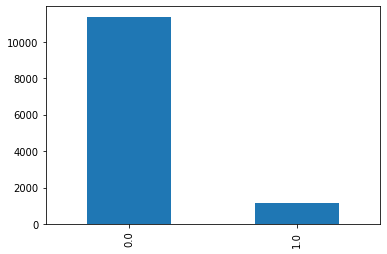

In [44]:
train['target_class'].value_counts().plot(kind='bar')

The dataset is imbalanced with class 1 as minority class

#### List the columns in dataset

In [45]:
train.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

#### Use KNN Imputer to impute missing values

In [46]:
from sklearn.impute import KNNImputer
 
# Imputer object using the mean strategy and
# missing_values type for imputation
imputer1 = KNNImputer(n_neighbors=2, weights="uniform")
traindata = imputer1.fit_transform(train)

In [47]:
train

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


#### Create traindata as imputed dataset having no null values

In [48]:
traindata = pd.DataFrame(traindata, columns = train.columns)

In [49]:
traindata

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,49.888095,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,30.786414,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [50]:
traindata.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

#### Divide the dataset into X and y

In [51]:
X = traindata.drop('target_class', axis = 1)
y = traindata['target_class']

In [52]:
X

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,49.888095,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143
12524,115.617188,46.784600,0.218177,0.226757,6.140468,30.786414,5.732201,34.357283
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018


In [53]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12523    0.0
12524    0.0
12525    0.0
12526    0.0
12527    0.0
Name: target_class, Length: 12528, dtype: float64

In [54]:
!pip install imbalanced-learn

#### Import SMOTE to make the dataset balanced

In [55]:
from imblearn.over_sampling import SMOTE

#### Oversampling the minority class

In [56]:
sm = SMOTE(random_state=42)
X_sampled, y_sampled = sm.fit_resample(X,y)

In [57]:
X_sampled

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,49.888095,2.958066,7.197842
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128
...,...,...,...,...,...,...,...,...
22745,10.846926,30.163812,7.335288,54.195711,151.015447,66.033738,-0.336088,-0.569376
22746,8.187508,30.810011,7.605270,56.852540,150.770072,66.012768,-0.353776,-0.512919
22747,33.219642,32.083637,5.224716,30.673990,42.092299,61.008821,1.661905,2.298929
22748,51.804559,35.047686,2.896689,12.427673,28.981990,66.368535,2.144148,3.129397


In [58]:
y_sampled_pd = pd.DataFrame(data=y_sampled)

#### Balanced dataset according to target_class

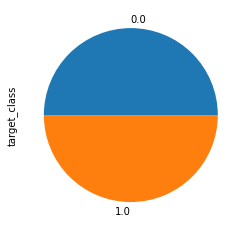

In [59]:
y_sampled_pd['target_class'].value_counts().plot(kind='pie')

#### Split the dataset into 80% training set and 20% test set

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled_pd, test_size=0.20 , random_state=42)

#### Use StandardScaler to apply transformation to training and test set

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [62]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

#### Apply SVM with rbf kernel and note the accuracy

In [63]:
from sklearn.metrics import accuracy_score
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print('Support Vector Machine RBF kernel accuracy= ', accuracy_score(y_test, y_pred_rbf))

Support Vector Machine RBF kernel accuracy=  0.9437362637362637


#### Print the classification report

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      2305
         1.0       0.97      0.91      0.94      2245

    accuracy                           0.94      4550
   macro avg       0.95      0.94      0.94      4550
weighted avg       0.95      0.94      0.94      4550



#### Apply SVM with linear kernel and note the accuracy

In [65]:
svm_linear= SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
print('Support Vector Machine Linear kernel accuracy= ', accuracy_score(y_test, y_pred_linear))

Support Vector Machine Linear kernel accuracy=  0.9406593406593406


#### Print the classification report

In [66]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      2305
         1.0       0.98      0.90      0.94      2245

    accuracy                           0.94      4550
   macro avg       0.94      0.94      0.94      4550
weighted avg       0.94      0.94      0.94      4550



In [67]:
svm_poly= SVC(kernel='poly')
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)
print('Support Vector Machine Linear kernel accuracy= ', accuracy_score(y_test, y_pred_poly))

Support Vector Machine Linear kernel accuracy=  0.9380219780219781


Inference:


1.   The dataset was imbalanced, but it was balanced using SMOTE technique
2.   The rbf kernel of SVM has more accuracy than linear and poly kernels.



Conclusion: Hence, from this experiment, I understood the working of Support vector machine and its different kernels. Also, I applied SVM on Pulsar dataset. The dataset was balanced using SMOTE technique. Then, SVM with rbf,linear and poly kernels was applied and rbf kernel gave the highest accuracy of 94.37%.